<a href="https://colab.research.google.com/github/Falgunikalambe4/FalaguniKalambe_data_science_Assignment-1/blob/main/datascience_assig_1linear_regression_p.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [10]:
data = pd.read_excel('AirQualityUCI.xlsx')



In [11]:
data_cleaned = data.replace(-200, np.nan)
data_cleaned.drop(columns=['NMHC(GT)'], inplace=True)


In [12]:
for column in data_cleaned.columns:
    if data_cleaned[column].isna().sum() > 0:
        median_value = data_cleaned[column].median()
        data_cleaned[column].fillna(median_value, inplace=True)

In [13]:
X = data_cleaned[['PT08.S1(CO)']].values
y = data_cleaned['CO(GT)'].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = model.predict(X_test)


In [17]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.7307295506736198
R^2 Score: 0.6104007078430055


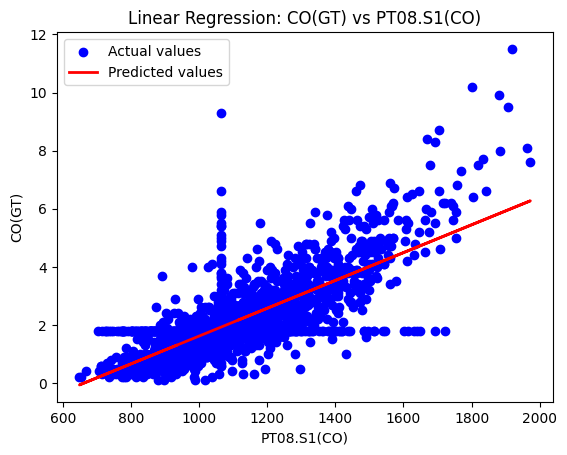

In [18]:
plt.scatter(X_test, y_test, color='blue', label='Actual values')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted values')
plt.xlabel('PT08.S1(CO)')
plt.ylabel('CO(GT)')
plt.title('Linear Regression: CO(GT) vs PT08.S1(CO)')
plt.legend()
plt.show()